# Create DFR3 object

In [ ]:
from pyincore import FragilityService, IncoreClient
from pyincore import Mapping, MappingSet, FragilityCurveSet, StandardFragilityCurve
from pyincore import ConditionalStandardFragilityCurve, PeriodStandardFragilityCurve

In [2]:
client = IncoreClient()
fragilitysvc = FragilityService(client)

## Fragility Curve Set

### Ways to create Fragility Curve Set Object

#### 0. upload fragility curveset to dfr3 services
- Note that this is optional as now you can use local fragility curveset now
- We will cover how to create and use local fragility curveset in this tutorial later 

In [3]:
fragility_metadata = {       
    "description": "Test Tsunami fragility when < 5000 ft^2",
    "authors": [
        "Federal Emergency Management Agency (FEMA)"
    ],      
    "resultType": "Limit State",
    "demandType": "momentumFlux",
    "demandUnits": "ft^3/s^2",
    "hazardType": "tsunami",
    "inventoryType": "building",
    "fragilityCurves": [
        {
            "className": "StandardFragilityCurve",
            "description": "Immediate Occupancy",
            "alpha": 1.0,
            "beta": 0.74,
            "alphaType": "median",
            "curveType": "LogNormal"
        },
        {
            "className": "StandardFragilityCurve",
            "description": "Life Safety",
            "alpha": 2.0,
            "beta": 0.74,
            "alphaType": "median",
            "curveType": "LogNormal"
        },
        {
            "className": "StandardFragilityCurve",
            "description": "Collapse Prevention",
            "alpha": 3.1,
            "beta": 0.77,
            "alphaType": "lambda",
            "curveType": "LogNormal"
        }
    ]       
}

created_fragility = fragilitysvc.create_dfr3_set(fragility_metadata)
created_fragility

{'id': '5f15c6b35283e6166bf87348',
 'legacyId': None,
 'description': 'Test Tsunami fragility when < 5000 ft^2',
 'authors': ['Federal Emergency Management Agency (FEMA)'],
 'paperReference': None,
 'resultUnit': None,
 'resultType': 'Limit State',
 'hazardType': 'tsunami',
 'inventoryType': 'building',
 'creator': 'cwang138',
 'demandType': 'momentumFlux',
 'demandUnits': 'ft^3/s^2',
 'fragilityCurves': [{'className': 'StandardFragilityCurve',
   'description': 'Immediate Occupancy',
   'alpha': 1.0,
   'beta': 0.74,
   'alphaType': 'median',
   'curveType': 'LogNormal'},
  {'className': 'StandardFragilityCurve',
   'description': 'Life Safety',
   'alpha': 2.0,
   'beta': 0.74,
   'alphaType': 'median',
   'curveType': 'LogNormal'},
  {'className': 'StandardFragilityCurve',
   'description': 'Collapse Prevention',
   'alpha': 3.1,
   'beta': 0.77,
   'alphaType': 'lambda',
   'curveType': 'LogNormal'}]}

#### 1. Use ID from incore dfr3 services

In [4]:
fragility_set_id = "5b47b2d7337d4a36187c61ce"

# IN-CORE client
client = IncoreClient()

# Initiate fragility service
fragility_services = FragilityService(client)

# Create local fragility curve set by id from the service
fragility_curve_set = FragilityCurveSet(fragility_services.get_dfr3_set(fragility_set_id))

fragility_curve_set

#### 2. Write JSON definition

In [5]:
fragility_curveset_json_str = '''{
    "id": "5b47b2d7337d4a36187c61ce",
    "legacyId": "SF_S1_206",
    "description": "Mid-Rise Steel Moment Frame",
    "authors": [
        "Elnashai and Jeong"
    ],
    "paperReference": null,
    "resultUnit": null,
    "resultType": "Limit State",
    "hazardType": "earthquake",
    "inventoryType": "building",
    "creator": "incore",
    "demandType": "PGA",
    "demandUnits": "g",
    "fragilityCurves": [
        {
            "className": "PeriodStandardFragilityCurve",
            "description": "Moderate",
            "alpha": -0.571,
            "beta": 0.665,
            "alphaType": "lambda",
            "curveType": "LogNormal",
            "periodParam2": 0,
            "periodParam1": 0,
            "periodParam0": 1.08,
            "periodEqnType": 1
        },
        {
            "className": "PeriodStandardFragilityCurve",
            "description": "Extensive",
            "alpha": 0.352,
            "beta": 0.675,
            "alphaType": "lambda",
            "curveType": "LogNormal",
            "periodParam2": 0,
            "periodParam1": 0,
            "periodParam0": 1.08,
            "periodEqnType": 1
        },
        {
            "className": "PeriodStandardFragilityCurve",
            "description": "Complete",
            "alpha": 1.341,
            "beta": 0.746,
            "alphaType": "lambda",
            "curveType": "LogNormal",
            "periodParam2": 0,
            "periodParam1": 0,
            "periodParam0": 1.08,
            "periodEqnType": 1
        }
    ]
}
'''
fragility_curve_set = FragilityCurveSet.from_json_str(fragility_curveset_json_str)
fragility_curve_set

#### 3. Construct fragility curves from scratch

In [6]:
# create a period standard fragility curve set with three limit state
fragility_curve_moderate = PeriodStandardFragilityCurve({
    "description": "Moderate",
    "alpha": -0.571,
    "beta": 0.665,
    "alphaType":"lambda",
    "curveType":"LogNormal",
    "periodParam2":0,
    "periodParam1":0,
    "periodParam0":1.08,
    "periodEqnType":1
})

fragility_curve_extensive = PeriodStandardFragilityCurve({
    "description": "Extensive",
    "alpha": 0.352,
    "beta": 0.675,
    "alphaType":"lambda",
    "curveType":"LogNormal",
    "periodParam2":0,
    "periodParam1":0,
    "periodParam0":1.08,
    "periodEqnType":1
})

fragility_curve_complete = PeriodStandardFragilityCurve({
    "description": "Complete",
    "alpha": 1.341,
    "beta": 0.746,
    "alphaType":"lambda",
    "curveType":"LogNormal",
    "periodParam2":0,
    "periodParam1":0,
    "periodParam0":1.08,
    "periodEqnType":1
})

In [7]:
# place three curves into a set with extra metadata
metadata = {
    "id":"local_fragility_curve_set",
    "description": "Mid-Rise Steel Moment Frame",
    "demandType": "PGA",
    "demandUnits": "g",
    "resultType":"Limit State",
    "hazardType":"earthquake",
    "inventoryType":"building",
    "fragilityCurves":[
        fragility_curve_moderate,
        fragility_curve_extensive,
        fragility_curve_complete,
    ]
}

# construct the fragility curve object to use
fragility_curve_set = FragilityCurveSet(metadata)
fragility_curve_set

### Example of how to use the fragility curve and curveset

#### Use in damage probability calculation

In [8]:
probabilities = fragility_curve_set.calculate_limit_state(hazard=10, period=1, std_dev=0.1)
probabilities

OrderedDict([('immocc', 0.999990362886121),
             ('lifesfty', 0.9978721323375376),
             ('collprev', 0.8992978633268922)])

#### Visualization your curve

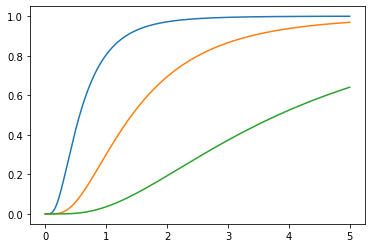

In [9]:
from scipy.stats import lognorm
import pylab as pl
import numpy as np

mean_moderate = fragility_curve_moderate.alpha
stddev_moderate = fragility_curve_moderate.beta
dist_moderate = lognorm(s=stddev_moderate, scale=np.exp(mean_moderate))
x=np.linspace(0,5,200)
pl.plot(x,dist_moderate.cdf(x))

mean_extensive = fragility_curve_extensive.alpha
stddev_extensive = fragility_curve_extensive.beta
dist_extensive = lognorm(s=stddev_extensive, scale=np.exp(mean_extensive))
x=np.linspace(0,5,200)
pl.plot(x,dist_extensive.cdf(x))

mean_complete = fragility_curve_complete.alpha
stddev_complete = fragility_curve_complete.beta
dist_complete = lognorm(s=stddev_complete, scale=np.exp(mean_complete))
x=np.linspace(0,5,200)
pl.plot(x,dist_complete.cdf(x))

#### Use the functions on each individual curve

In [10]:
# exmample of A single period standard fragility curve
fragility_curve_moderate = PeriodStandardFragilityCurve({
    "description": "Moderate",
    "alpha": -0.571,
    "beta": 0.665,
    "alphaType":"lambda",
    "curveType":"LogNormal",
    "periodParam2":0,
    "periodParam1":0,
    "periodParam0":1.08,
    "periodEqnType":1
})

# get building period from the fragility curve
building_period = fragility_curve_moderate.get_building_period(num_stories = 10)
print("building period is :", building_period, "\n" )

# get limit state probability
probability = fragility_curve_moderate.calculate_limit_state_probability(hazard = 4)
print("limit state probability is :" , probability, "\n")

# adjust this curve for liquefaction
print("(alpha, beta) before liquefaction adjust:", fragility_curve_moderate.alpha, fragility_curve_moderate.beta)
fragility_curve_moderate.adjust_fragility_for_liquefaction(liquefaction = "U")
print("(alpha, beta) after liquefaction adjust:", fragility_curve_moderate.alpha, fragility_curve_moderate.beta)

building period is : 1.08 

limit state probability is : 0.9983763310617616 

(alpha, beta) before liquefaction adjust: -0.571 0.665
(alpha, beta) after liquefaction adjust: -0.48534999999999995 0.665


## DFR3 Mapping Set

### Ways to create Mapping Object

#### 0. upload fragility mapping to dfr3 services
- Note that this is optional as now you can use local fragility mapping now
- We will cover how to create and use local fragility mapping in this tutorial later
- you can look up the fragility IDs in the DFR3 viewer
![alt text](./lookup_fragility_id.png)

In [11]:
mapping_meatadata = {
  "name": "pytest - Tsunami Building Fragility Mapping",
  "hazardType": "tsunami",
  "inventoryType": "building",
  "mappingType": "fragility",
  "mappings": [
      {
          "entry": {
              "Non-Retrofit Inundation Fragility ID Code": "5bbbaedfec2309046c2745c8",
              "Non-Retrofit MomentumFlux Fragility ID Code": "5bbbae19ec2309046c2745c6"
          },
          "rules": [
              [
                 "java.lang.String struct_typ EQUALS W1"
              ]
          ]
      },
      {
          "entry": {
              "Non-Retrofit Inundation Fragility ID Code": "5bbbaf58ec2309046c2745c9",
              "Non-Retrofit MomentumFlux Fragility ID Code": "5bbbae5eec2309046c2745c7"
          },
          "rules": [
              [
                  "java.lang.String struct_typ EQUALS W2"
              ]
          ]
      },
      {
          "entry": {
               "Non-Retrofit Inundation Fragility ID Code": "5bbbafcdec2309046c2745ca",
              "Non-Retrofit MomentumFlux Fragility ID Code": "5bbbba6bec2309046c2745d8"
          },
          "rules": [
              [
                  "java.lang.String struct_typ EQUALS RC"
              ]
          ]
      }
  ]
}
created_mapping = fragilitysvc.create_mapping(mapping_meatadata)
created_mapping

{'id': '5f15c6b43efd0e4ebccfd570',
 'name': 'pytest - Tsunami Building Fragility Mapping',
 'hazardType': 'tsunami',
 'inventoryType': 'building',
 'mappings': [{'legacyEntry': {},
   'entry': {'Non-Retrofit Inundation Fragility ID Code': '5bbbaedfec2309046c2745c8',
    'Non-Retrofit MomentumFlux Fragility ID Code': '5bbbae19ec2309046c2745c6'},
   'rules': [['java.lang.String struct_typ EQUALS W1']]},
  {'legacyEntry': {},
   'entry': {'Non-Retrofit Inundation Fragility ID Code': '5bbbaf58ec2309046c2745c9',
    'Non-Retrofit MomentumFlux Fragility ID Code': '5bbbae5eec2309046c2745c7'},
   'rules': [['java.lang.String struct_typ EQUALS W2']]},
  {'legacyEntry': {},
   'entry': {'Non-Retrofit Inundation Fragility ID Code': '5bbbafcdec2309046c2745ca',
    'Non-Retrofit MomentumFlux Fragility ID Code': '5bbbba6bec2309046c2745d8'},
   'rules': [['java.lang.String struct_typ EQUALS RC']]}],
 'creator': 'cwang138',
 'mappingType': 'fragility'}

#### 1. use mapping id from incore dfr3 services

In [12]:
mapping_id = "5b8ec84fec2309047299581f"

client = IncoreClient()
fragility_service = FragilityService(client)
mapping_set = MappingSet(fragility_service.get_mapping(mapping_id))
mapping_set

#### 2. write mapping json definition file

In [13]:
mapping_metadata = '''
{
    "id": "5b8ec84fec2309047299581f",
    "name": "Shelby Water Network MMSA",
    "hazardType": "earthquake",
    "inventoryType": "water_facility",
    "mappings": [
        {
            "legacyEntry": {},
            "entry": {
                "pga": "5b7d81ffec230904683d5073"
            },
            "rules": [
                [
                    "java.lang.String data_type EQUALS 'tank'"
                ]
            ]
        },
        {
            "legacyEntry": {},
            "entry": {
                "pga": "5b7d8284ec230904683d5074"
            },
            "rules": [
                [
                    "java.lang.String data_type EQUALS 'pump'",
                    "java.lang.String subtype EQUALS 'booster_pump'"
                ]
            ]
        },
        {
            "legacyEntry": {},
            "entry": {
                "pga": "5b7d8284ec230904683d5074"
            },
            "rules": [
                [
                    "java.lang.String data_type EQUALS 'pump'",
                    "java.lang.String subtype EQUALS 'pump_0'"
                ]
            ]
        },
        {
            "legacyEntry": {},
            "entry": {
                "pga": "5b7d829aec230904683d5075"
            },
            "rules": [
                [
                    "java.lang.String data_type EQUALS 'pump'",
                    "java.lang.String subtype EQUALS 'pump_1'"
                ]
            ]
        },
        {
            "legacyEntry": {},
            "entry": {
                "pga": "5b7d82a6ec230904683d5076"
            },
            "rules": [
                [
                    "java.lang.String data_type EQUALS 'pump'",
                    "java.lang.String subtype EQUALS 'pump_2'"
                ]
            ]
        },
        {
            "legacyEntry": {},
            "entry": {
                "pga": "5b7d82b3ec230904683d5077"
            },
            "rules": [
                [
                    "java.lang.String data_type EQUALS 'pump'",
                    "java.lang.String subtype EQUALS 'pump_3'"
                ]
            ]
        }
    ],
    "mappingType": "fragility"
}
'''

mapping_set = MappingSet.from_json_str(mapping_metadata)
mapping_set

#### 3. construct mapping object from scratch

- create Fragility Curves and Curveset
- details please refer to previous section "Construct fragility curves from scratch"

In [14]:
# 0. create FragilityCurve (if you want to do everything from the very very scratch)
fragility_curve_moderate = PeriodStandardFragilityCurve({
    "description": "Moderate",
    "alpha":-0.453,
    "beta": 0.794,
    "alphaType":"lambda",
    "curveType":"LogNormal",
    "periodParam2":0,
    "periodParam1":0,
    "periodParam0":0.75,
    "periodEqnType":1
})
fragility_curve_extensive = PeriodStandardFragilityCurve({
    "description": "Extensive",
    "alpha": 0.372,
    "beta": 0.794,
    "alphaType": "lambda",
    "curveType": "LogNormal",
    "periodParam2": 0,
    "periodParam1": 0,
    "periodParam0": 0.75,
    "periodEqnType": 1
})
fragility_curve_complete = PeriodStandardFragilityCurve({
    "description": "Complete",
    "alpha":1.198,
    "beta": 0.794,
    "alphaType":"lambda",
    "curveType":"LogNormal",
    "periodParam2":0,
    "periodParam1":0,
    "periodParam0":0.75,
    "periodEqnType":1
})
fragilitycurveset_metadata = {
    "id":"local_fragility_curve_set_1",
    "demandType": "PGA",
    "demandUnits": "g",
    "resultType":"Limit State",
    "hazardType":"earthquake",
    "inventoryType":"building",
    "fragilityCurves":[
        fragility_curve_moderate,
        fragility_curve_extensive,
        fragility_curve_complete,
    ]
}
fragility_curveset_1 = FragilityCurveSet(fragilitycurveset_metadata)

# 1. Alternatively, you can create FragilityCurveSet objects directly from a json
fragility_curveset_2 = FragilityCurveSet.from_json_file('periodStandardFragilityCurve.json')

- creating Mapping objects and put Fragility curvesets into the mappings

In [15]:
entry_1 = {"Non-Retrofit Fragility ID Code": fragility_curveset_1}
rules_1 = [[ "int no_stories GE 4","int no_stories LE 7"]]
mapping_1 = Mapping(entry_1, rules_1)

entry_2 = {"Non-Retrofit Fragility ID Code": fragility_curveset_2}
rules_2 = [["int no_stories GE 1", "int no_stories LE 3"]]
mapping_2 = Mapping(entry_2, rules_2)

- create MappingSet object

In [16]:
mappingset_metadata = {
    'id': 'local placeholder',
    'name': 'testing local mapping object creation',
    'hazardType': 'earthquake',
    'inventoryType': 'building',
    'mappings': [
        mapping_1,
        mapping_2,
    ],
    'mappingType': 'fragility'
}
local_building_mapping_set = MappingSet(mappingset_metadata)

### Example of using DFR3 mapping object in pyincore

In [17]:
from pyincore.analyses.buildingdamage import BuildingDamage

bldg_dmg = BuildingDamage(client)
bldg_dmg.load_remote_input_dataset("buildings", '5a284f0bc7d30d13bc081a28')
bldg_dmg.set_parameter("result_name", 'local_mapping_fragility_memphis_eq_bldg_dmg_result')

Dataset already exists locally. Reading from local cached zip.
Unzipped folder found in the local cache. Reading from it...


True

#### Method 1: Load Remote Mapping id from IN-CORE services

In [19]:
fragility_service = FragilityService(client)
mapping_set = MappingSet(fragility_service.get_mapping(mapping_id="5b47b350337d4a3629076f2c"))
bldg_dmg.set_input_dataset('dfr3_mapping_set', mapping_set)

True

#### Method 2: Directly load locally created Mapping Object

In [20]:
# Note: local_building_mapping_set is created in the previous section in this notebook
bldg_dmg.set_input_dataset("dfr3_mapping_set", local_building_mapping_set)

True

In [21]:
bldg_dmg.set_parameter("hazard_type", 'earthquake')
bldg_dmg.set_parameter("hazard_id", '5b902cb273c3371e1236b36b')
bldg_dmg.set_parameter("num_cpu", 4)

# Run Analysis
bldg_dmg.run_analysis()

True